<a href="https://colab.research.google.com/github/GoradiaNishant/DSML/blob/main/Gender_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><H1>Gender Prediction by Name</H1></p>

## model generation

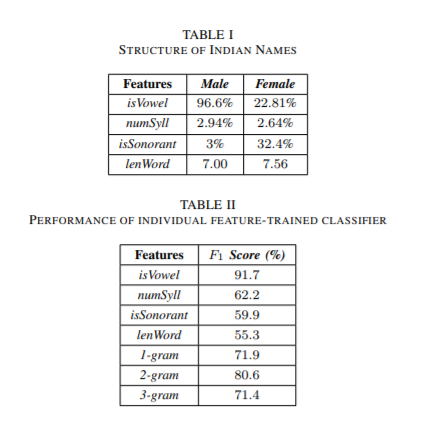

In [ ]:
!wget https://raw.githubusercontent.com/andela-iamao/ML-classifying-genders/master/dataset/NationalNames.csv

--2021-04-23 06:08:25--  https://raw.githubusercontent.com/andela-iamao/ML-classifying-genders/master/dataset/NationalNames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44350518 (42M) [text/plain]
Saving to: ‘NationalNames.csv’

NationalNames.csv   100%[===================>]  42.30M  55.3MB/s    in 0.8s    

2021-04-23 06:08:26 (55.3 MB/s) - ‘NationalNames.csv’ saved [44350518/44350518]



In [ ]:
from pandas import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/NationalNames.csv')
dataset

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [ ]:
dataset = dataset.drop_duplicates(subset="Name")
dataset

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825414,1825415,Zichen,2014,M,5
1825415,1825416,Ziden,2014,M,5
1825418,1825419,Zijun,2014,M,5
1825419,1825420,Zilas,2014,M,5


In [ ]:
def checkVowelEnd(name):
  if name[-1] in "aeiou":
    return "Vowel End"
  return "Consonant End"

dataset["Vowel/Consonant End"] = dataset["Name"].apply(checkVowelEnd)
dataset


,Id,Name,Year,Gender,Count,Vowel/Consonant End
0,1,Mary,1880,F,7065,Consonant End
1,2,Anna,1880,F,2604,Vowel End
2,3,Emma,1880,F,2003,Vowel End
3,4,Elizabeth,1880,F,1939,Consonant End
4,5,Minnie,1880,F,1746,Vowel End
...,...,...,...,...,...,...
1825414,1825415,Zichen,2014,M,5,Consonant End
1825415,1825416,Ziden,2014,M,5,Consonant End
1825418,1825419,Zijun,2014,M,5,Consonant End
1825419,1825420,Zilas,2014,M,5,Consonant End


In [ ]:
def checkGender(gender):
    if gender == "F":
        return 0
    return 1
    
dataset["Gender Value"] = dataset["Gender"].apply(checkGender)
dataset

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value
0,1,Mary,1880,F,7065,Consonant End,0
1,2,Anna,1880,F,2604,Vowel End,0
2,3,Emma,1880,F,2003,Vowel End,0
3,4,Elizabeth,1880,F,1939,Consonant End,0
4,5,Minnie,1880,F,1746,Vowel End,0
...,...,...,...,...,...,...,...
1825414,1825415,Zichen,2014,M,5,Consonant End,1
1825415,1825416,Ziden,2014,M,5,Consonant End,1
1825418,1825419,Zijun,2014,M,5,Consonant End,1
1825419,1825420,Zilas,2014,M,5,Consonant End,1


In [ ]:
def compare(group):
    return dataset.groupby([group])["Gender Value"].sum()*100/dataset.groupby([group])["Gender Value"].count()

dataset.groupby(["Vowel/Consonant End"])["Gender Value"].sum()

Vowel/Consonant End
Consonant End    26129
Vowel End         7830
Name: Gender Value, dtype: int64

In [ ]:
female_names = sum(dataset.groupby(["Vowel/Consonant End"])["Gender Value"].sum())
all_names = dataset.groupby(["Gender"])["Gender Value"].count()
print (all_names)
print ("\nBoth are equal? %s" % str(female_names == all_names["F"]))


Gender
F    59930
M    33959
Name: Gender Value, dtype: int64

Both are equal? False


In [ ]:
def vowelConsonantStart(name):
  if name[0] in "aeiou":
    	return "Vowel Start"
  return "Consonant Start"

dataset["Vowel/Consonant Start"] = dataset["Name"].apply(vowelConsonantStart)

print("\n Comparison => %s", compare("Vowel/Consonant Start"))




 Comparison => %s Vowel/Consonant Start
Consonant Start    36.169306
Name: Gender Value, dtype: float64


In [ ]:
def shortLongName(name):
    if len(name) < 7:
        return "Short"
    return "Long"

dataset["Short/Long Name"] = dataset["Name"].apply(shortLongName)
print(compare("Short/Long Name"))


Short/Long Name
Long     29.360484
Short    42.645470
Name: Gender Value, dtype: float64


In [ ]:
X = dataset[["Gender Value", "Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]]
X.head()

,Gender Value,Vowel/Consonant Start,Short/Long Name,Vowel/Consonant End
0,0,Consonant Start,Short,Consonant End
1,0,Consonant Start,Short,Vowel End
2,0,Consonant Start,Short,Vowel End
3,0,Consonant Start,Long,Consonant End
4,0,Consonant Start,Short,Vowel End


In [ ]:
def reprCategory(column):
  column = column.astype("category")
  return column.cat.codes
    
X[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]] = X[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]].apply(reprCategory)

X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender Value,Vowel/Consonant Start,Short/Long Name,Vowel/Consonant End
0,0,0,1,0
1,0,0,1,1
2,0,0,1,1
3,0,0,0,0
4,0,0,1,1


In [ ]:
train, test = train_test_split(X, test_size = 0.20)

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(train[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]], train["Gender Value"])

In [ ]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = model.predict(test[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]])
accuracy_score(test["Gender Value"], predictions)

0.7345830226861221

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


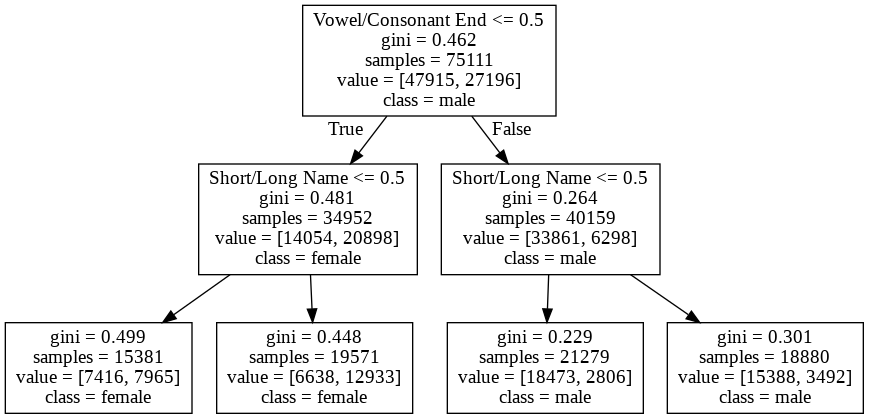

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(model,feature_names=["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"], out_file=dot_data,class_names=['male','female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())


In [ ]:
dataset1=pd.read_csv('/content/Indian_Names.csv')
dataset1

,Name
0,aabid
1,aabida
2,aachal
3,aadesh
4,aadil
...,...
6481,zishan
6482,ziyabul
6483,zoya
6484,zuhaib


In [ ]:
import numpy as np

X=np.array
X=dataset1["Name"].values

def checkVowelEnd(name):
  if name[-1] in "aeiou":
    return 1
  return 0

def vowelConsonantStart(name):
  if name[0] in "aeiou":
    return 1
  return 0

def shortLongName(name):
    if len(name) < 7:
      return 1
    return 0


result1=[]
for row in X:
  ds=[vowelConsonantStart(str(row)),shortLongName(str(row)),checkVowelEnd(str(row))]
  result1.append(model.predict([ds]))

In [ ]:
dataset1["Gender"]=result1
dataset1.to_csv("/content/indian.csv")

## other dataset

In [ ]:
!wget https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv
!wget https://gist.githubusercontent.com/mbejda/9b93c7545c9dd93060bd/raw/b582593330765df3ccaae6f641f8cddc16f1e879/Indian-Female-Names.csv

--2021-04-24 10:20:59--  https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297859 (291K) [text/plain]
Saving to: ‘Indian-Male-Names.csv’

Indian-Male-Names.c 100%[===================>] 290.88K  --.-KB/s    in 0.02s   

2021-04-24 10:21:00 (11.6 MB/s) - ‘Indian-Male-Names.csv’ saved [297859/297859]

--2021-04-24 10:21:00--  https://gist.githubusercontent.com/mbejda/9b93c7545c9dd93060bd/raw/b582593330765df3ccaae6f641f8cddc16f1e879/Indian-Female-Names.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubus

In [ ]:
from pandas import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [ ]:
maledataset=pd.read_csv('/content/Indian-Male-Names.csv')
femaledataset=pd.read_csv('/content/Indian-Female-Names.csv')

In [ ]:
maledataset.drop("race",axis=1,inplace=True)
femaledataset.drop("race",axis=1,inplace=True)

In [ ]:
combinedf = pd.concat([maledataset,femaledataset],ignore_index=True)
combinedf

,name,gender
0,barjraj,m
1,ramdin verma,m
2,sharat chandran,m
3,birender mandal,m
4,amit,m
...,...,...
30222,saroj devi,f
30223,naina @ geeta,f
30224,manju d/0 baboo lal jatav,f
30225,shivani,f


In [ ]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# filtered = re.sub('[^a-zA-Z]',' ', combinedf['name'][0])
# filtered
new_dataset = []
for i in range(0,30227):
  filtered = re.sub('[^a-zA-Z]',' ', str(combinedf['name'][i]))
  new_dataset.append(filtered)

combinedf["name"]=new_dataset
combinedf.to_csv("a.csv")

In [ ]:
def checkVowelEnd(name):
  if str(name)[-1] in "aeiou":
    return "Vowel End"
  return "Consonant End"

combinedf["Vowel/Consonant End"] = combinedf["name"].apply(checkVowelEnd)
combinedf

,name,gender,Vowel/Consonant End
0,barjraj,m,Consonant End
1,ramdin verma,m,Vowel End
2,sharat chandran,m,Consonant End
3,birender mandal,m,Consonant End
4,amit,m,Consonant End
...,...,...,...
30222,saroj devi,f,Vowel End
30223,naina geeta,f,Vowel End
30224,manju d baboo lal jatav,f,Consonant End
30225,shivani,f,Vowel End


In [ ]:
def checkGender(gender):
    if gender == "f":
        return 0
    return 1
    
combinedf["Gender Value"] = combinedf["gender"].apply(checkGender)
combinedf

,name,gender,Vowel/Consonant End,Gender Value
0,barjraj,m,Consonant End,1
1,ramdin verma,m,Vowel End,1
2,sharat chandran,m,Consonant End,1
3,birender mandal,m,Consonant End,1
4,amit,m,Consonant End,1
...,...,...,...,...
30222,saroj devi,f,Vowel End,0
30223,naina geeta,f,Vowel End,0
30224,manju d baboo lal jatav,f,Consonant End,0
30225,shivani,f,Vowel End,0


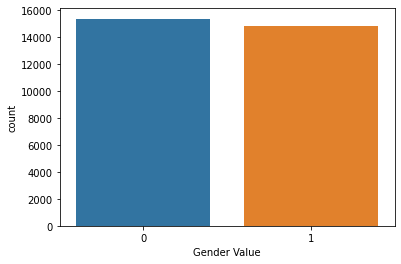

In [ ]:
sns.countplot(x=combinedf["Gender Value"])

In [ ]:
def shortLongName(name):
    if len(str(name)) < 5:
        return "Short"
    return "Long"

combinedf["Short/Long Name"] = combinedf["name"].apply(shortLongName)
combinedf

,name,gender,Vowel/Consonant End,Gender Value,Short/Long Name
0,barjraj,m,Consonant End,1,Long
1,ramdin verma,m,Vowel End,1,Long
2,sharat chandran,m,Consonant End,1,Long
3,birender mandal,m,Consonant End,1,Long
4,amit,m,Consonant End,1,Short
...,...,...,...,...,...
30222,saroj devi,f,Vowel End,0,Long
30223,naina geeta,f,Vowel End,0,Long
30224,manju d baboo lal jatav,f,Consonant End,0,Long
30225,shivani,f,Vowel End,0,Long


In [ ]:
def vowelConsonantStart(name):
  if str(name)[0] in "aeiou":
    	return "Vowel Start"
  return "Consonant Start"

combinedf["Vowel/Consonant Start"] = combinedf["name"].apply(vowelConsonantStart)
combinedf

,name,gender,Vowel/Consonant End,Gender Value,Short/Long Name,Vowel/Consonant Start
0,barjraj,m,Consonant End,1,Long,Consonant Start
1,ramdin verma,m,Vowel End,1,Long,Consonant Start
2,sharat chandran,m,Consonant End,1,Long,Consonant Start
3,birender mandal,m,Consonant End,1,Long,Consonant Start
4,amit,m,Consonant End,1,Short,Vowel Start
...,...,...,...,...,...,...
30222,saroj devi,f,Vowel End,0,Long,Consonant Start
30223,naina geeta,f,Vowel End,0,Long,Consonant Start
30224,manju d baboo lal jatav,f,Consonant End,0,Long,Consonant Start
30225,shivani,f,Vowel End,0,Long,Consonant Start


In [ ]:
X = combinedf[["Gender Value","Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]]
X.head()

,Gender Value,Vowel/Consonant Start,Short/Long Name,Vowel/Consonant End
0,1,Consonant Start,Long,Consonant End
1,1,Consonant Start,Long,Vowel End
2,1,Consonant Start,Long,Consonant End
3,1,Consonant Start,Long,Consonant End
4,1,Vowel Start,Short,Consonant End


In [ ]:
def reprCategory(column):
  column = column.astype("category")
  return column.cat.codes
    
X[["Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]] = X[["Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]].apply(reprCategory)

X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender Value,Vowel/Consonant Start,Short/Long Name,Vowel/Consonant End
0,1,0,0,0
1,1,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,1,1,0


In [ ]:
X.corr()

,Gender Value,Vowel/Consonant Start,Short/Long Name,Vowel/Consonant End
Gender Value,1.000000,0.090502,-0.054918,-0.545816
Vowel/Consonant Start,0.090502,1.000000,0.165821,-0.044861
Short/Long Name,-0.054918,0.165821,1.000000,0.123935
Vowel/Consonant End,-0.545816,-0.044861,0.123935,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 864x432 with 0 Axes>

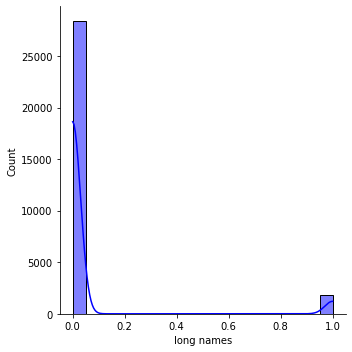

In [ ]:
plt.figure(figsize=(12,6))
longname=X[(X['Gender Value']>0)]
sns.displot(X["Short/Long Name"],kde=True,bins=20,color='blue')
plt.xlabel("long names")
plt.show()

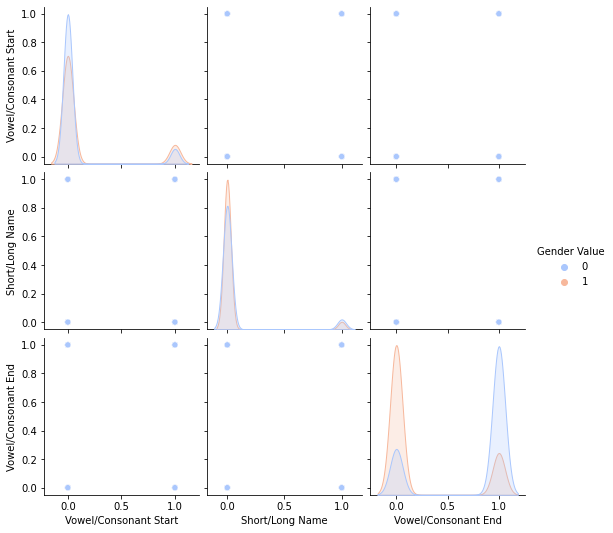

In [ ]:
sns.pairplot(X, hue ="Gender Value", palette ='coolwarm')

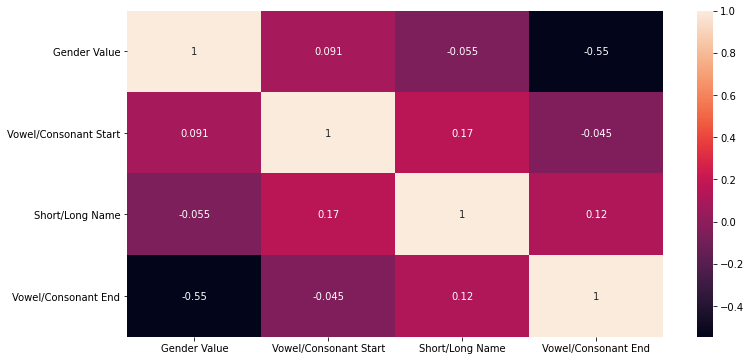

In [ ]:
plt.figure(figsize=(12,6))
corr=X[["Gender Value","Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
train, test = train_test_split(X, test_size = 0.20)

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(train[["Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]], train["Gender Value"])

In [ ]:
predictions = model.predict(test[["Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"]])
print("model accuracy :- ",round(accuracy_score(test["Gender Value"], predictions)*100),"%")

model accuracy :-  77 %


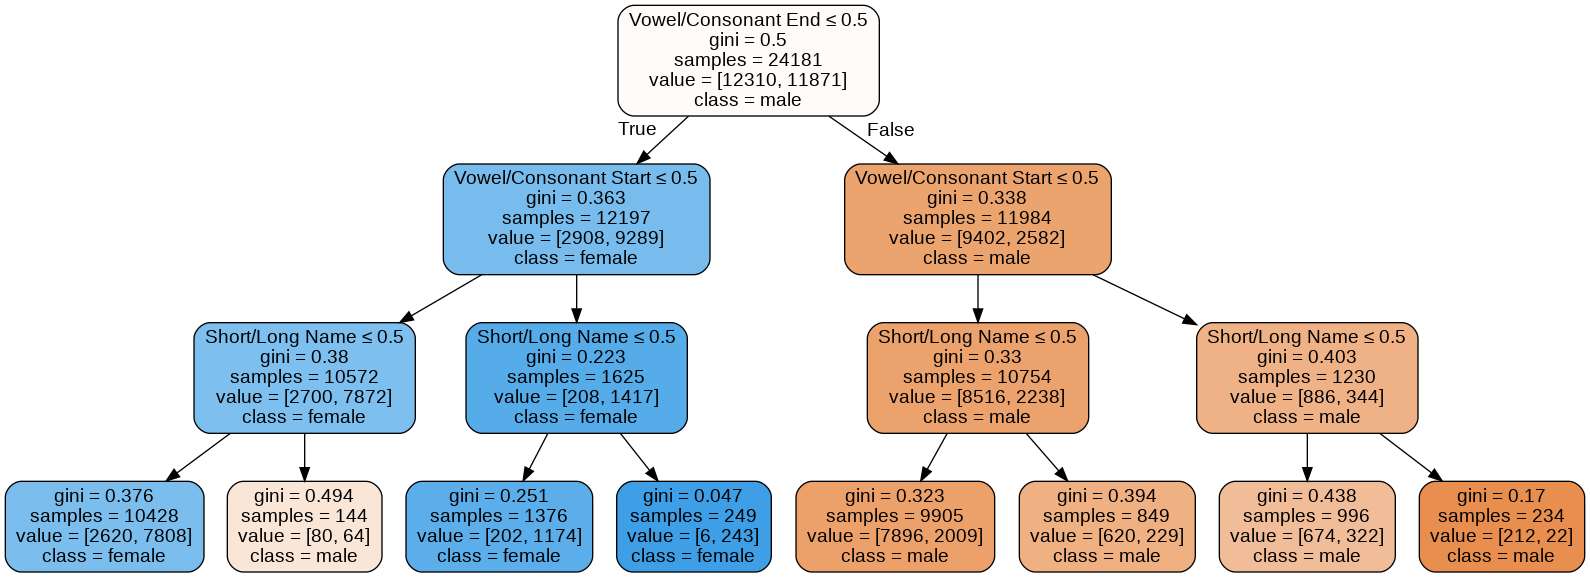

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model,filled=True, rounded=True,
                special_characters=True,
                feature_names=["Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End"], 
                out_file=dot_data,
                class_names=['male','female'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())


In [ ]:
def checkVowelEnd(name):
  if name[-1] in "aeiou":
    return 1
  return 0

def vowelConsonantStart(name):
  if name[0] in "aeiou":
    	return 1
  return 0

def shortLongName(name):
    if len(name) < 7:
        return 1
    return 0

name="nishant"
ds=[vowelConsonantStart(name),shortLongName(name),checkVowelEnd(name)]
g=model.predict([ds])
if g == 0:
  print("female")
else:
  print("male")

male


## model export and import and implementing in FLASK

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'gpred.pkl')
  
saved_model = joblib.load('/content/gpred.pkl') 

In [ ]:
!pip install flask-ngrok

In [ ]:
def checkVowelEnd(name):
  if name[-1] in "aeiou":
    return 1
  return 0

def vowelConsonantStart(name):
  if name[0] in "aeiou":
    	return 1
  return 0

def shortLongName(name):
    if len(name) < 7:
        return 1
    return 0

In [ ]:
with open('/content/templates/index.html', 'w') as writefile:
    writefile.write(html)

In [ ]:
html="""
%%writefile templates/index.html
<html>
    <head>
        <title></title>
    </head>
    <body>
        First App... checking...
        <form method="POST" action="{{url_for('predict')}}">
            <input type="text" name="pname">
            <button type="submit">PREDICT</button>
        </form>
    </body>
</html>
"""

In [ ]:
from flask import Flask, render_template, url_for, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__, template_folder='/content/templates')
run_with_ngrok(app)  

@app.route('/')
def index():
    # return 'hello'
    return render_template('index.html')

@app.route('/results', methods=['POST'])
def results():
    if request.method == 'POST':
        pname = request.form['pname']
        ds=[vowelConsonantStart(pname),shortLongName(pname),checkVowelEnd(pname)]
        result=saved_model.predict([ds])
        if result==1:
          name="Male"
        else:
          name="Female"
    return name
    # render_template('results.html', name=name)

app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b0f10c454c12.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [24/Apr/2021 06:25:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Apr/2021 06:25:39] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [24/Apr/2021 06:25:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Apr/2021 06:25:42] "POST /results HTTP/1.1" 200 -
